In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [7]:
read = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv")

In [7]:
read

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [9]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
read["Created Date"] = pd.to_datetime(read["Created Date"])

In [27]:
read["Created Date"]

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300693   2015-03-29 00:33:41
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 300698, dtype: datetime64[ns]

In [11]:
read["Closed Date"] = pd.to_datetime(read["Closed Date"])

In [31]:
read["Closed Date"]

0        2016-01-01 00:55:00
1        2016-01-01 01:26:00
2        2016-01-01 04:51:00
3        2016-01-01 07:43:00
4        2016-01-01 03:24:00
                 ...        
300693                   NaT
300694   2015-03-29 02:33:59
300695   2015-03-29 03:40:20
300696   2015-03-29 04:38:35
300697   2015-03-29 04:41:50
Name: Closed Date, Length: 300698, dtype: datetime64[ns]

In [13]:
read["Request_Closing_Time"] = read["Closed Date"] - read["Created Date"]

In [35]:
read[["Created Date", "Closed Date", "Request_Closing_Time"]]

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02
...,...,...,...
300693,2015-03-29 00:33:41,NaT,NaT
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,0 days 02:00:31
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,0 days 03:07:17
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,0 days 04:05:33


In [37]:
read.drop(columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1', 
                     'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number',
                     'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip',
                     'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up Location',
                     'Bridge Highway Name','Bridge Highway Direction', 'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction',
                     'Ferry Terminal Name','Landmark', 'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
                     'Resolution Action Updated Date','Community Board','Facility Type', 'Location'], inplace = True )

In [39]:
read.to_csv("Customer Service_Requests_from_2010_to_Present.csv", index = False)

In [41]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              300698 non-null  int64          
 1   Created Date            300698 non-null  datetime64[ns] 
 2   Closed Date             298534 non-null  datetime64[ns] 
 3   Agency                  300698 non-null  object         
 4   Complaint Type          300698 non-null  object         
 5   Descriptor              294784 non-null  object         
 6   Location Type           300567 non-null  object         
 7   Incident Zip            298083 non-null  float64        
 8   City                    298084 non-null  object         
 9   Status                  300698 non-null  object         
 10  Resolution Description  300698 non-null  object         
 11  Borough                 300698 non-null  object         
 12  Latitude        

In [43]:
read.isna().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

In [45]:
read.dropna(inplace = True)

In [47]:
read.isna().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [49]:
read['Unique Key'].unique()

array([32310363, 32309934, 32309159, ..., 30283424, 30280004, 30281825],
      dtype=int64)

In [51]:
read['Created Date'].unique()

<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]

In [53]:
read['Closed Date'].unique()

<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-03-29 00:57:23', '2015-03-29 02:57:41', '2015-03-29 01:02:39',
 '2015-03-29 04:14:27', '2015-03-29 08:41:24', '2015-03-29 02:52:28',
 '2015-03-29 01:13:01', '2015-03-29 02:33:59', '2015-03-29 04:38:35',
 '2015-03-29 04:41:50']
Length: 231991, dtype: datetime64[ns]

In [55]:
read['Agency'].unique()

array(['NYPD'], dtype=object)

In [57]:
read['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [59]:
read['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Vehicle', 'Loud Talking', 'Banging/Pounding', 'Car/Truck Music',
       'Tortured', 'In Prohibited Area', 'Double Parked Blocking Traffic',
       'Congestion/Gridlock', 'Neglected', 'Car/Truck Horn', 'In Public',
       'Other (complaint details)', 'No Shelter', 'Truck Route Violation',
       'Unlicensed', 'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant'], dtype=object)

In [61]:
read['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot'], dtype=object)

In [63]:
read['Incident Zip'].unique()

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462., 11385., 11414., 11213.,
       11375., 11211., 10312., 10017., 11417., 10002., 10027., 11209.,
       10035., 11418., 11421., 11205., 10468., 11355., 11358., 11210.,
       11368., 11427., 11436., 10308., 11364., 10011., 11423., 11230.,
       10003., 11221., 11416., 11378., 11236., 11218., 10029., 10028.,
       11214., 11207., 11369., 11223., 11220., 10302., 11420., 11354.,
       10473., 10301., 11103., 10465., 11377., 11212., 11365., 10472.,
       10452., 11203., 10469., 11237., 11434., 11101., 10460., 11229.,
       11206., 11102., 10466., 10009., 10033., 11694., 10022., 10470.,
       11433., 11428., 11413., 10463., 10471., 10474., 11228., 10014.,
       10475., 11225., 11233., 11370., 11204., 11435., 10459., 11238.,
      

In [65]:
read['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [67]:
read['Status'].unique()

array(['Closed'], dtype=object)

In [69]:
read['Resolution Description'].unique()

array(['The Police Department responded and upon arrival those responsible for the condition were gone.',
       'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.',
       'The Police Department responded to the complaint and took action to fix the condition.',
       'The Police Department issued a summons in response to the complaint.',
       'The Police Department responded to the complaint and determined that police action was not necessary.',
       'The Police Department reviewed your complaint and provided additional information below.',
       'Your request can not be processed at this time because of insufficient contact information. Please create a new Service Request on NYC.gov and provide more detailed contact information.',
       "This complaint does not fall under the Police Department's jurisdiction.",
       'The Police Department responded to the complaint and a report was prepared

In [71]:
read['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [73]:
read['Latitude'].unique()

array([40.86568154, 40.77594531, 40.87032452, ..., 40.77664592,
       40.70635259, 40.71605291])

In [75]:
read['Longitude'].unique()

array([-73.92350096, -73.91509394, -73.88852464, ..., -73.94880526,
       -73.87124456, -73.9913785 ])

In [77]:
read['Request_Closing_Time'].unique()

<TimedeltaArray>
['0 days 00:55:15', '0 days 01:26:16', '0 days 04:51:31', '0 days 07:45:14',
 '0 days 03:27:02', '0 days 01:53:30', '0 days 01:57:28', '0 days 01:47:55',
 '0 days 08:33:02', '0 days 01:23:02',
 ...
 '0 days 06:46:59', '0 days 07:28:23', '0 days 05:13:46', '0 days 05:19:11',
 '0 days 10:22:47', '0 days 09:46:41', '0 days 15:40:46', '0 days 04:44:52',
 '0 days 09:44:44', '0 days 15:42:26']
Length: 47134, dtype: timedelta64[ns]

In [15]:
read['closing_time_in_seconds'] = read['Request_Closing_Time'].dt.total_seconds() / 3600

In [81]:
read.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291107 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Unique Key               291107 non-null  int64          
 1   Created Date             291107 non-null  datetime64[ns] 
 2   Closed Date              291107 non-null  datetime64[ns] 
 3   Agency                   291107 non-null  object         
 4   Complaint Type           291107 non-null  object         
 5   Descriptor               291107 non-null  object         
 6   Location Type            291107 non-null  object         
 7   Incident Zip             291107 non-null  float64        
 8   City                     291107 non-null  object         
 9   Status                   291107 non-null  object         
 10  Resolution Description   291107 non-null  object         
 11  Borough                  291107 non-null  object         
 12  Latitud

In [83]:
read.describe(include = float).loc[['mean', 'std']]

,Incident Zip,Latitude,Longitude,closing_time_in_seconds
mean,10857.977349,40.725681,-73.925035,4.308926
std,580.280774,0.082411,0.078654,6.062641


In [85]:
read.sum(numeric_only = True).loc[['Incident Zip', 'Latitude', 'Longitude', 'closing_time_in_seconds']]

Incident Zip               3.160833e+09
Latitude                   1.185553e+07
Longitude                 -2.152010e+07
closing_time_in_seconds    1.254358e+06
dtype: float64

In [87]:
read.skew(numeric_only = True).loc[['Incident Zip', 'Latitude', 'Longitude', 'closing_time_in_seconds']]

Incident Zip               -2.553956
Latitude                    0.123114
Longitude                  -0.312739
closing_time_in_seconds    14.299525
dtype: float64

In [89]:
read.kurt(numeric_only = True).loc[['Incident Zip', 'Latitude', 'Longitude', 'closing_time_in_seconds']]

Incident Zip                37.827777
Latitude                    -0.734818
Longitude                    1.455600
closing_time_in_seconds    849.777081
dtype: float64

In [91]:
read.corr(numeric_only=True)['closing_time_in_seconds'].loc[['Incident Zip', 'Latitude', 'Longitude', 'closing_time_in_seconds']]

Incident Zip               0.057182
Latitude                   0.024497
Longitude                  0.109724
closing_time_in_seconds    1.000000
Name: closing_time_in_seconds, dtype: float64

In [93]:
read.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291107 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Unique Key               291107 non-null  int64          
 1   Created Date             291107 non-null  datetime64[ns] 
 2   Closed Date              291107 non-null  datetime64[ns] 
 3   Agency                   291107 non-null  object         
 4   Complaint Type           291107 non-null  object         
 5   Descriptor               291107 non-null  object         
 6   Location Type            291107 non-null  object         
 7   Incident Zip             291107 non-null  float64        
 8   City                     291107 non-null  object         
 9   Status                   291107 non-null  object         
 10  Resolution Description   291107 non-null  object         
 11  Borough                  291107 non-null  object         
 12  Latitud

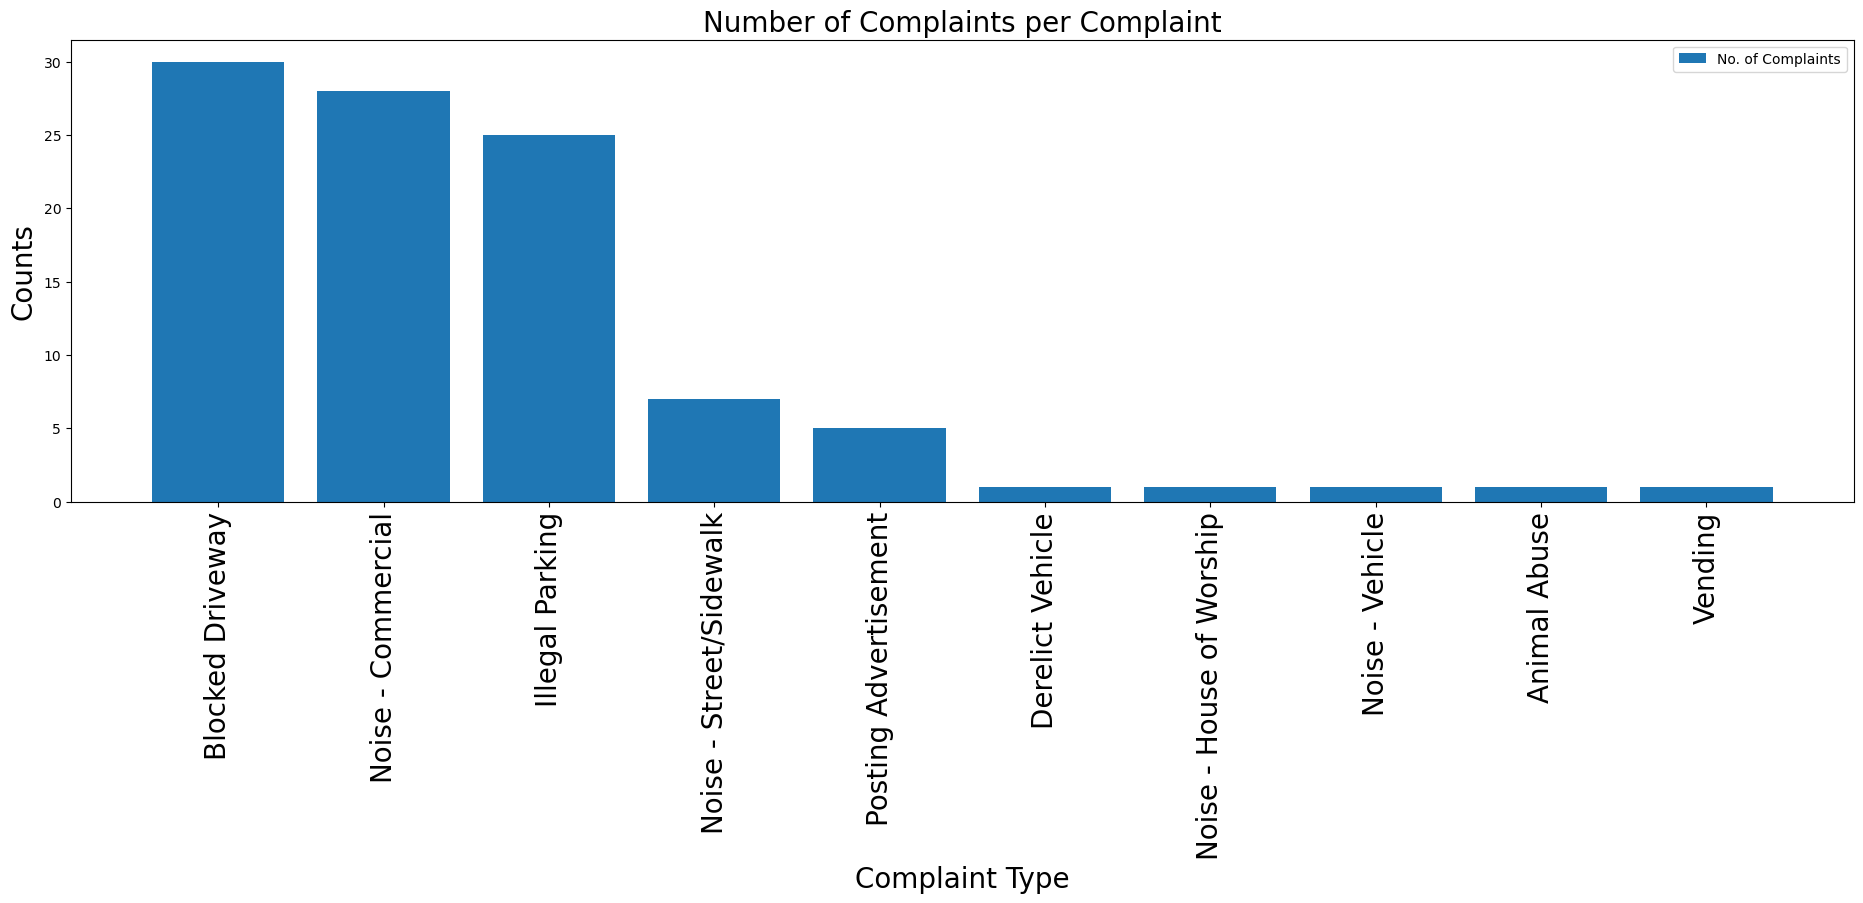

In [104]:
a = read["Complaint Type"].head(100).value_counts()
plt.figure(figsize=(23,6))
plt.bar(a.index, a.values, label="No. of Complaints")
plt.xlabel("Complaint Type", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.yticks(np.arange(0,a.max()+5,5))
plt.xticks(rotation = 90, fontsize=20)
plt.title("Number of Complaints per Complaint", fontsize=20)
plt.legend()
plt.show()

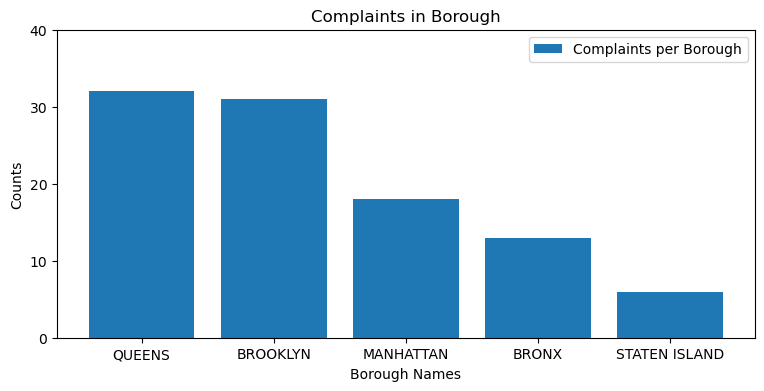

In [97]:
br = read["Borough"].head(100)
brough = br.value_counts()
plt.figure(figsize=(9,4))
plt.bar(brough.index, brough.values, label="Complaints per Borough")
plt.xlabel("Borough Names")
plt.ylabel("Counts")
plt.yticks(np.arange(0,brough.max()+10,10))
plt.title("Complaints in Borough")
plt.legend()
plt.show()

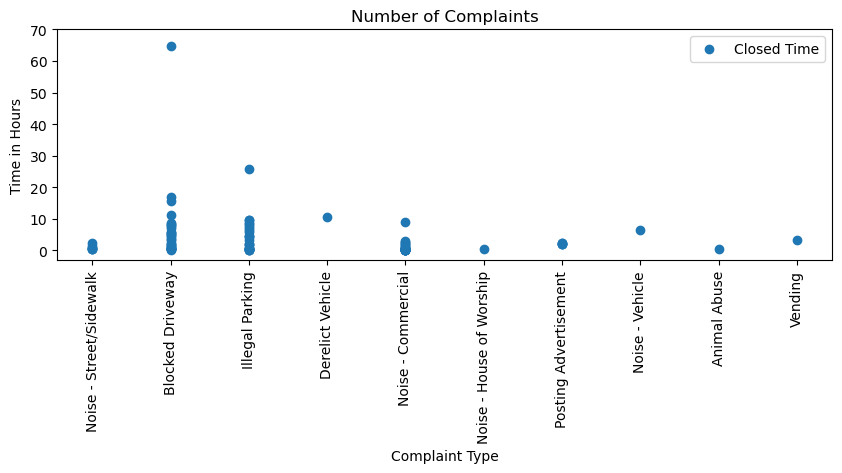

In [122]:
complaint = read["Complaint Type"].head(100)
closing_time = read["closing_time_in_seconds"].head(100)
plt.figure(figsize=(10,3))
plt.scatter(complaint, closing_time, label="Closed Time")
plt.xlabel("Complaint Type")
plt.ylabel("Time in Hours")
plt.yticks(np.arange(0,closing_time.max()+10,10))
plt.xticks(rotation = 90, fontsize=10)
plt.title("Number of Complaints")
plt.legend()
plt.show()

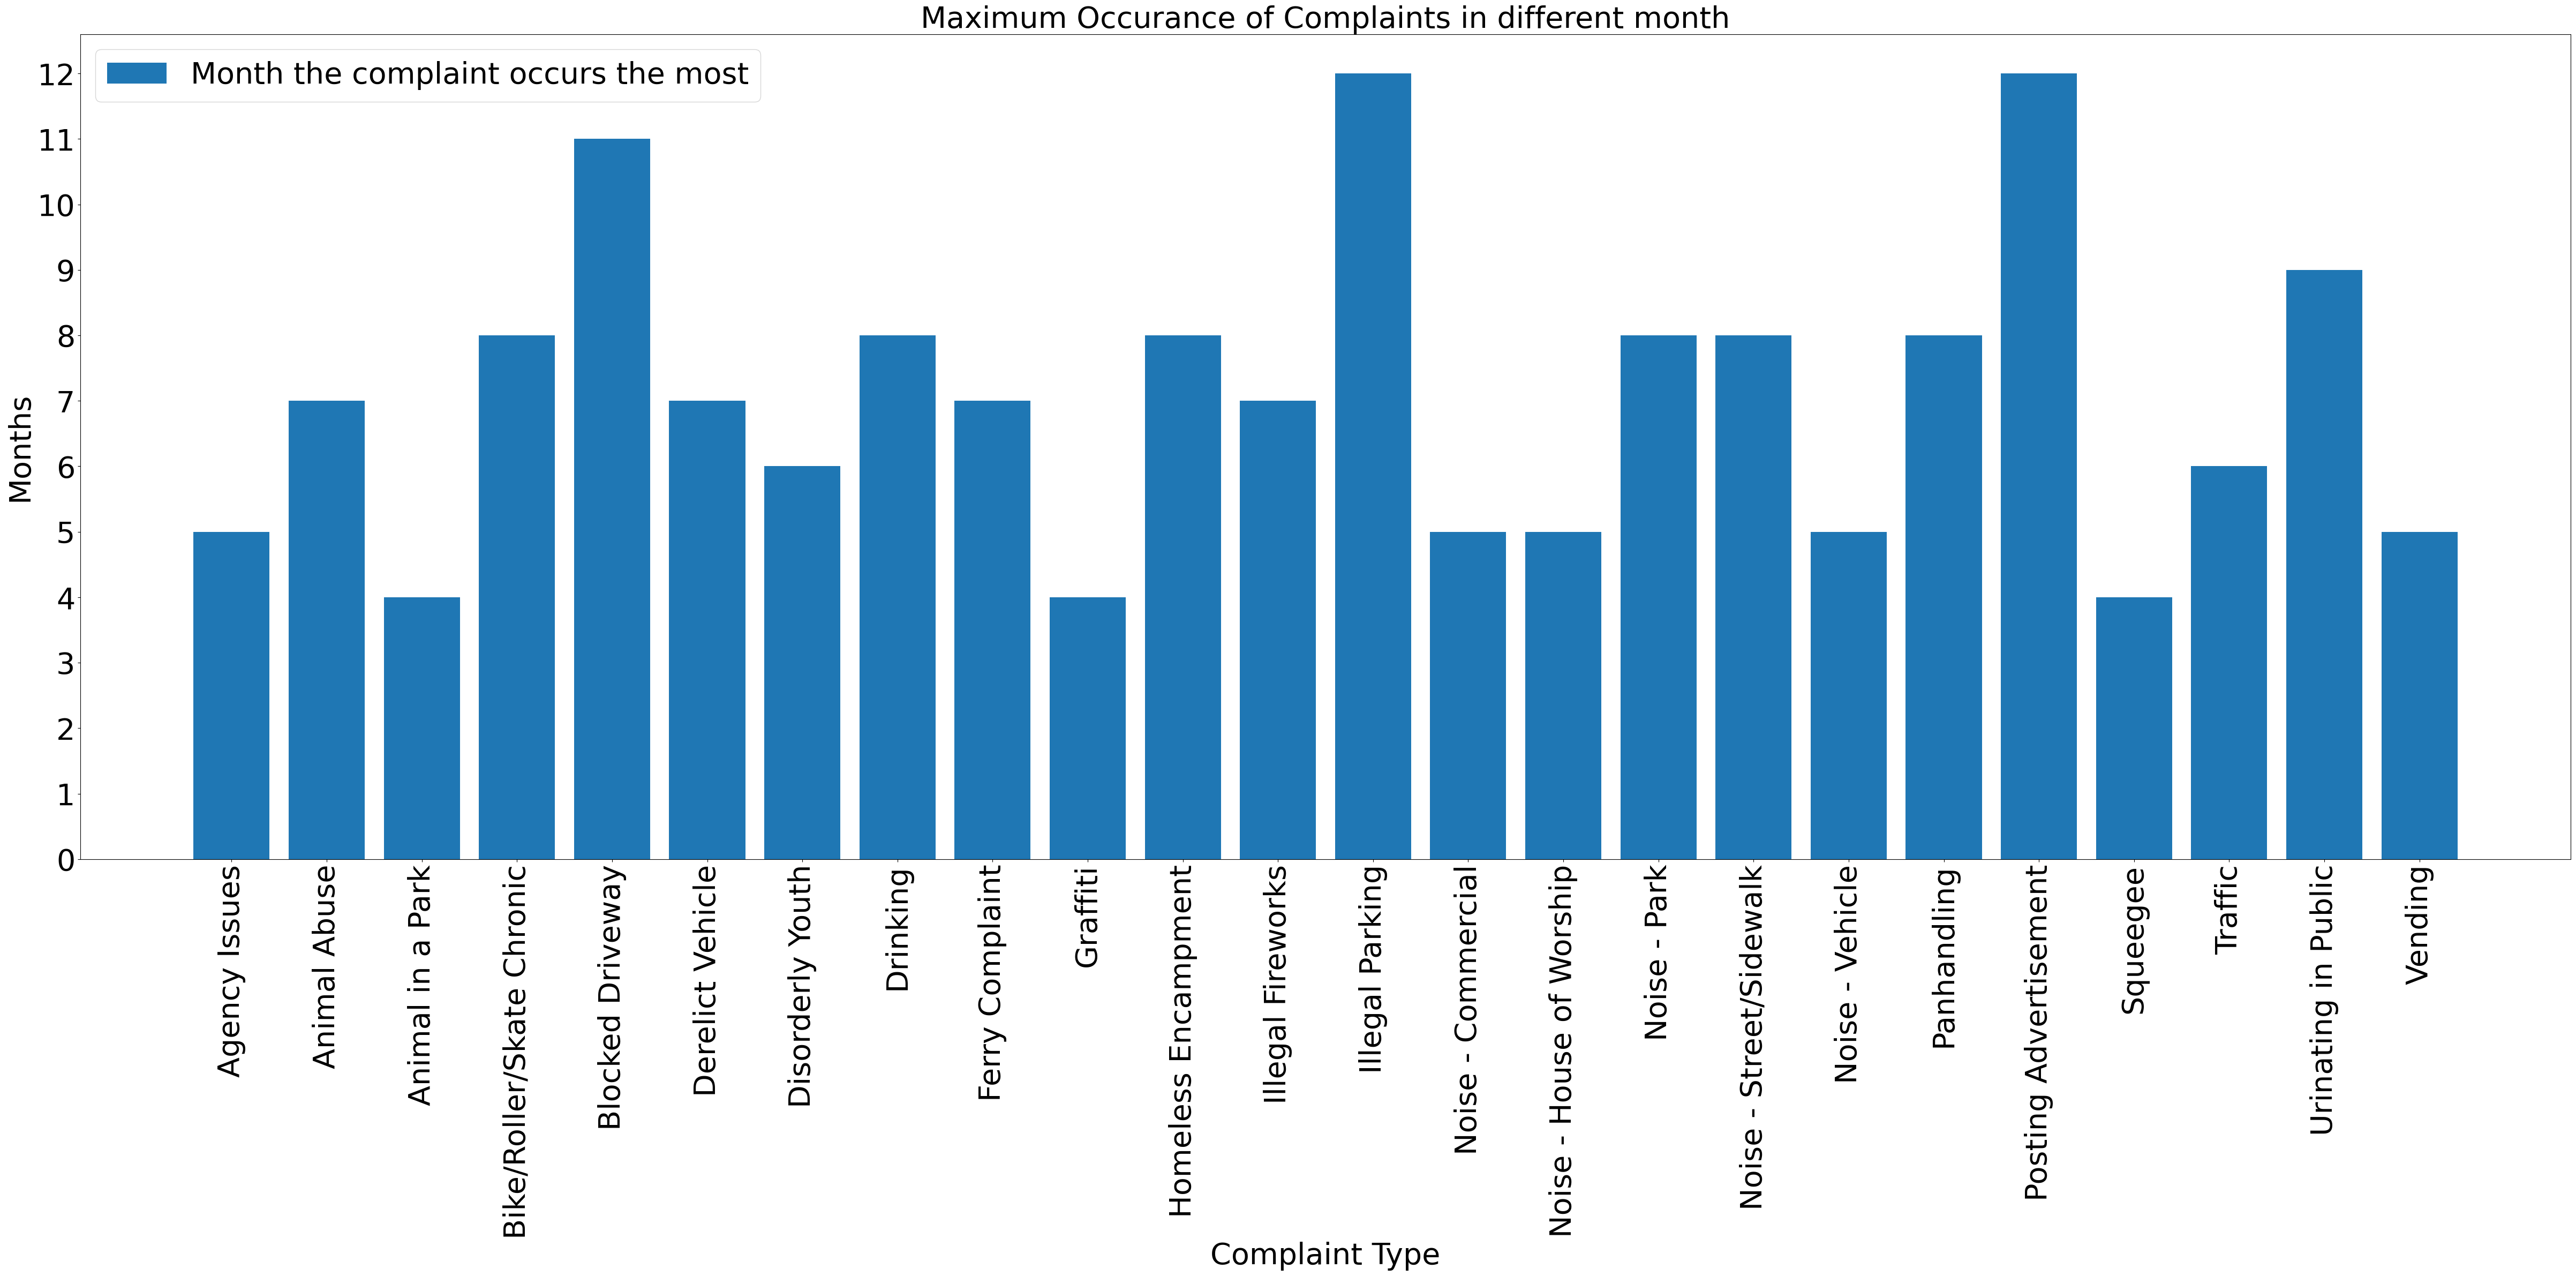

In [126]:
read['months'] = read['Created Date'].dt.month
frequent = pd.DataFrame(read.groupby('Complaint Type')['months'].agg(lambda x: x.mode().iloc[0])).reset_index()
plt.figure(figsize=(60,20))
plt.bar(frequent['Complaint Type'], frequent['months'], label = "Month the complaint occurs the most")
plt.xlabel("Complaint Type", fontsize=40)
plt.ylabel("Months", fontsize=40)
plt.yticks(np.arange(0,13,1), fontsize=40)
plt.xticks(fontsize=40, rotation = 90)
plt.title("Maximum Occurance of Complaints in different month", fontsize=40)
plt.legend(fontsize=40)
plt.show()

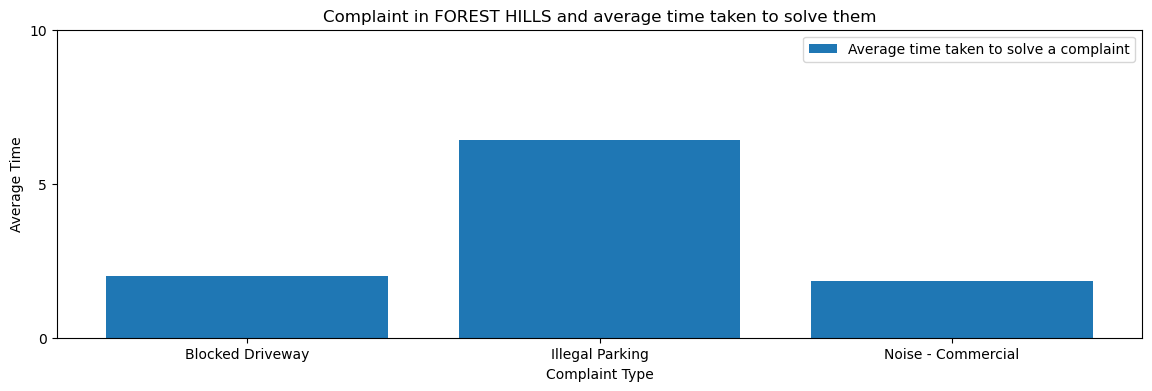

In [176]:
df = read[['Complaint Type', 'City', 'closing_time_in_seconds']].head(100)
data = df.groupby(['City', 'Complaint Type'])['closing_time_in_seconds'].mean().reset_index()
city = 'FOREST HILLS'
g = data[data['City'] == city]
plt.figure(figsize=(14,4))
plt.bar(g['Complaint Type'], g['closing_time_in_seconds'], label = "Average time taken to solve a complaint")
plt.xlabel("Complaint Type")
plt.ylabel("Average Time")
plt.yticks(np.arange(0, g['closing_time_in_seconds'].max()+5, 5))
plt.title("Complaint in FOREST HILLS and average time taken to solve them")
plt.legend()
plt.show()

In [27]:
res = read[['Complaint Type', 'closing_time_in_seconds']].dropna()
top_complaints = res['Complaint Type'].value_counts().head(5).index
fil = res[res['Complaint Type'].isin(top_complaints)]

groups = [group['closing_time_in_seconds'].values 
          for name, group in fil.groupby('Complaint Type')]

f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val <= 0.05:  
    print('We can reject the null hypothesis')  
else:  
    print('We can accept the null hypothesis')

F-statistic: 1799.600524153762
P-value: 0.0
We can reject the null hypothesis


In [182]:
dat = pd.crosstab(read['Complaint Type'], read['City'])

test, p_val, dof, expected_val = chi2_contingency(dat)  
alpha = 0.05
print("The p-value of our test is " + str(p_val))  

if p_val <= alpha:  
    print('We can reject the null hypothesis')  
else:  
    print('We can accept the null hypothesis')


The p-value of our test is 0.0
We can reject the null hypothesis
